<a href="https://colab.research.google.com/github/rmendesl/TCC/blob/master/04_CreateModelScikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando o Modelo - Supervisionado

Primeiramente, devemos distinguir 4 tipos de tarefas de aprendizagem de máquina:
* Aprendizagem supervisionada;
* Aprendizagem não-supervisionada;
* Aprendizagem semi-supervisionada;
* Aprendizagem por reforço;

Nosso modelo será o supervisionado, aprendizagem supervisionada é a tarefa de encontrar uma função a partir de dados de treinamento rotulados. O objetivo é encontrar os parâmetros ótimos que ajustem um modelo que possa prever rótulos desconhecidos em outros objetos (o conjunto de teste). Se o rótulo é um número real, a tarefa chama-se regressão. Se o rótulo vem de um conjunto finito e não ordenado, então a tarefa chama-se classificação, essa última será a nossa tarefa.

A classificação binária é uma técnica supervisionada de aprendizado de máquina, na qual o objetivo é prever rótulos de classe categóricos que sejam discretos e não monitorados, como Aprovado/Reprovado, Positivo/Negativo, Padrão/Não Padrão etc. Alguns casos de uso do mundo real para classificação estão listados abaixo : 
* Exames médicos para determinar se um paciente tem uma determinada doença ou não - a propriedade de classificação é a presença da doença. 
* Um método de teste "aprovado ou reprovado" ou controle de qualidade nas fábricas, ou seja, decidir se uma especificação foi ou não atendida - uma classificação de aprovação / não aprovação. 
* Recuperação de informações, ou seja, decidir se uma página ou um artigo deve estar no conjunto de resultados de uma pesquisa ou não - a propriedade de classificação é a relevância do artigo ou a utilidade para o usuário.

Não iremos entrar nos detalhes dos demais tipos de aprendizagem, porém, segue abaixo algumas fontes para consulta.


Fonte: https://medium.com/machina-sapiens/algoritmos-de-aprendizagem-de-m%C3%A1quina-qual-deles-escolher-67040ad68737

Fonte: https://medium.com/@categitau/in-one-of-my-previous-posts-i-introduced-machine-learning-and-talked-about-the-two-most-common-c1ac6e18df16

## Scikit-learn

A [Scikit-learn](https://scikit-learn.org/stable/index.html) é a mais popular biblioteca de aprendizado de máquina de código aberto que suporta aprendizado supervisionado e não supervisionado. Ele também fornece várias ferramentas para ajuste de modelo, pré-processamento de dados, seleção e avaliação de modelo e muitos outros utilitários.

Este projeto foi iniciado em 2007 como um projeto do Google Summer of Code por David Cournapeau. Mais tarde naquele ano, Matthieu Brucher começou a trabalhar nesse projeto como parte de sua tese. Em 2010, Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort e Vincent Michel do INRIA assumiram a liderança do projeto e fizeram o primeiro lançamento público, 1º de fevereiro de 2010. Desde então, vários lançamentos apareceram após um ciclo de 3 meses e uma próspero comunidade internacional tem liderado o desenvolvimento.

O processo de tomada de decisão e a estrutura de governança do scikit-learn são apresentados no [documento de governança.](https://scikit-learn.org/stable/governance.html#governance)

GitHub: https://github.com/scikit-learn

## Bibliotecas utilizadas

Referência para a bibioteca Pandas: https://pandas.pydata.org/docs/user_guide/index.html

Referência para a biblioteca Numpy: https://numpy.org/doc/

Referência para a biblioteca Seaborn: https://seaborn.pydata.org/tutorial.html

Referência para a biblioteca Matplotlib: https://matplotlib.org/index.html

In [330]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [331]:
# Configurando o tamanho da figura
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8, 6)

## Carregando os dados

### Montando o Drive do Google Drive

In [ ]:
# Execute apenas se desejar fazer o upload do arquivo local para o seu Google Drive
from google.colab import files
files.upload()

In [332]:
# Montando o drive do seu Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Carregando o arquivo para o dataframe

Use apenas uma das duas opções abaixo:

1.   Carregando direto do seu Google Drive;
2.   Carregando direto do link compartilhado;

Os dados para o modelo foram salvos em um arquivo CSV durante a etapa anterior.

* `base_model.csv`

In [333]:
# Troque o caminho root_path caso seu arquivo esteja em outra pasta em seu drive
root_path = 'drive/My Drive/TCC/'
data = 'base_model.csv'



---


1. Carregando direto do seu Google Drive

In [ ]:
# Carregando os dados do arquivo CSV para o dataframe
df_renovacao = pd.read_csv(root_path + data, sep='|')



---


2. Carregando direto do link compartilhado

In [334]:
# Use o link abaixo para ter acesso direto ao arquivo
link = "https://drive.google.com/uc?export=download&id=1uUHyv-ieXXNbS2SQ4n2Oj_E5N-NeVWHd"

# Carregando os dados do arquivo CSV para o dataframe
df_renovacao = pd.read_csv(link, sep='|')



---



In [335]:
# Lendo os primeiros e últimos registros do dataframe
df_renovacao

,COD_MATRICULA,REMATRICULADO,TIPO_INADIMPLENCIA,RISCO_INADIMPLENCIA,CLASSE_PAGANTE_ANT,CLASSE_PAGANTE_ATU,NOVO_FIES,PRV_ANT,PRV_ATU,LATE_COMER,NOM_SITUACAO_ALUNO,VAL_A_PAGAR,VAL_A_PAGAR_PAR,VAL_DIVIDA_MENS,VAL_DIVIDA_TOTAL,FAIXA_DE_DIVIDA,ADIMP_N_REN,CR_PER_ANT,FAIXA_APROVACAO,QTD_ACESSOS_19_2,QTD_ACESSOS_20_1,IND_INDICIO_EVASAO,CLASSIFICACAO_PROP_EVASAO,CLASSIFICACAO_PROP_RENOVACAO,ACEITE_CONTRATO,REQ_AGEND_TRANC,SAFRA
0,200701339023,0,ADIMPLENTE,SEM RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,51.18,0.00,0.00,0.00,SEM DIVIDA,1,9.00,7 - 100%,32.0,21.0,0,1 - Alto,3 - Médio Baixo,0,0,VETERANO
1,200702198245,0,INADIMPLENTE SEM NEGOCIACAO,MEDIO RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,0.00,0.00,3111.20,3111.20,> 1500,0,5.91,4 - 41% A 60%,48.0,48.0,0,3 - Médio Baixo,4 - Baixo,1,0,CALOURO
2,200702198679,0,INADIMPLENTE SEM NEGOCIACAO,MEDIO RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,0.00,0.00,3238.77,3238.77,> 1500,0,5.27,3 - 21% A 40%,53.0,46.0,0,4 - Baixo,4 - Baixo,0,0,VETERANO
3,200801431011,1,ADIMPLENTE,SEM RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,2521.12,0.00,0.00,0.00,SEM DIVIDA,0,9.89,7 - 100%,130.0,119.0,0,4 - Baixo,2 - Médio Alto,1,0,VETERANO
4,200901402225,1,ADIMPLENTE,BAIXO RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,170.96,0.00,0.00,0.00,SEM DIVIDA,0,3.50,4 - 41% A 60%,125.0,70.0,0,00 - Não Escorado,00 - Não Escorado,1,0,VETERANO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,201912030837,1,ADIMPLENTE,BAIXO RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,534.38,0.00,0.00,0.00,SEM DIVIDA,0,7.54,7 - 100%,143.0,133.0,0,4 - Baixo,3 - Médio Baixo,1,0,VETERANO
2139,201912030853,1,ADIMPLENTE,BAIXO RISCO,PAR,PAR,NÃO,0,0,ON TIME COMER,Ativo,1157.48,5.16,0.00,5.16,SEM DIVIDA,0,6.31,5 - 61% A 80%,64.0,42.0,0,2 - Médio Alto,3 - Médio Baixo,1,0,VETERANO
2140,201912030861,0,ADIMPLENTE,MEDIO RISCO,PAR,PAR,NÃO,0,0,ON TIME COMER,Trancado,0.00,4.88,0.00,0.00,SEM DIVIDA,0,7.43,7 - 100%,154.0,109.0,1,3 - Médio Baixo,3 - Médio Baixo,1,0,VETERANO
2141,201912030934,1,INADIMPLENTE COM NEGOCIACAO,BAIXO RISCO,PAR,PAR,NÃO,0,0,ON TIME COMER,Ativo,1486.82,606.04,0.00,489.79,SEM DIVIDA,0,6.14,7 - 100%,154.0,147.0,0,4 - Baixo,3 - Médio Baixo,1,0,VETERANO


## Modelo de Classificação

Referência: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

### Transformar as variáveis categóricas em numéricas para o modelo

Nos projetos de machine learning, uma parte importante é a engenharia de features. É muito comum ver recursos categóricos em um conjunto de dados. No entanto, nosso algoritmo de aprendizado de máquina pode apenas ler valores numéricos. É essencial codificar recursos categóricos em valores numéricos. Para isso iremos usar um método de [Category Encoders](http://contrib.scikit-learn.org/category_encoders/).

Essas são apenas algumas das maneiras diferentes de codificar recursos categóricos: 

1. LabelEncoder e OneHotEncoder 
2. OrdinalEncoder
3. TargetEncoder
4. DictVectorizer 
5. Pandas *get_dummies*

Avaliaremos o **OneHotEncoder** e o **TargetEncoder** em nosso projeto.

O Category Encoders pode já vir instalado no Goggle Colab, porém iremos realizar a instalação com o parâmetro -U. Dessa forma, caso tenha alguma atualização, ela já será aplicada.

`!pip install -U category_encoders`

Caso o pacote não esteja instalado, execute o comando abaixo primeiro:

`!pip install category_encoders`

In [336]:
!pip install -U category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.2.2)


#### OneHotEncoder

O OneHotEncoder é mais fácil de entender conceitualmente. Esse tipo de codificação simplesmente transforma cada valor categórico em uma nova coluna no dataset, o preenche essa nova coluna com um valor binário.

Referência: http://contrib.scikit-learn.org/category_encoders/onehot.html

In [337]:
# Importando o pacote necessário
from category_encoders.one_hot import OneHotEncoder

In [338]:
# Primeiro precisamos extrair as variáveis categoricas 
col_categoricas = list(df_renovacao.select_dtypes(include=['object']).columns)

# Inicializando OneHotEncoder
ohe = OneHotEncoder(cols=col_categoricas, use_cat_names=True) 

# Aplicando o OneHotEncoder nas colunas de variáveis categóricas
df_renovacao_ohe = ohe.fit_transform(df_renovacao)
df_renovacao_ohe

,COD_MATRICULA,REMATRICULADO,TIPO_INADIMPLENCIA_ADIMPLENTE,TIPO_INADIMPLENCIA_INADIMPLENTE SEM NEGOCIACAO,TIPO_INADIMPLENCIA_INADIMPLENTE COM NEGOCIACAO,RISCO_INADIMPLENCIA_SEM RISCO,RISCO_INADIMPLENCIA_MEDIO RISCO,RISCO_INADIMPLENCIA_BAIXO RISCO,RISCO_INADIMPLENCIA_ALTO RISCO,CLASSE_PAGANTE_ANT_MENSALISTA,CLASSE_PAGANTE_ANT_PROUNI,CLASSE_PAGANTE_ANT_FIES,CLASSE_PAGANTE_ANT_PAR,CLASSE_PAGANTE_ATU_MENSALISTA,CLASSE_PAGANTE_ATU_PROUNI,CLASSE_PAGANTE_ATU_FIES,CLASSE_PAGANTE_ATU_PAR,NOVO_FIES_NÃO,NOVO_FIES_SIM,PRV_ANT,PRV_ATU,LATE_COMER_ON TIME COMER,LATE_COMER_LATE COMER,NOM_SITUACAO_ALUNO_Ativo,NOM_SITUACAO_ALUNO_Trancado,NOM_SITUACAO_ALUNO_Transferido,VAL_A_PAGAR,VAL_A_PAGAR_PAR,VAL_DIVIDA_MENS,VAL_DIVIDA_TOTAL,FAIXA_DE_DIVIDA_SEM DIVIDA,FAIXA_DE_DIVIDA_> 1500,FAIXA_DE_DIVIDA_1000-1500,FAIXA_DE_DIVIDA_300-500,FAIXA_DE_DIVIDA_100-300,FAIXA_DE_DIVIDA_750-1000,FAIXA_DE_DIVIDA_500-750,ADIMP_N_REN,CR_PER_ANT,FAIXA_APROVACAO_7 - 100%,FAIXA_APROVACAO_4 - 41% A 60%,FAIXA_APROVACAO_3 - 21% A 40%,FAIXA_APROVACAO_5 - 61% A 80%,FAIXA_APROVACAO_1 - 0%,FAIXA_APROVACAO_6 - 81% A 99%,FAIXA_APROVACAO_2 - 1% A 20%,QTD_ACESSOS_19_2,QTD_ACESSOS_20_1,IND_INDICIO_EVASAO,CLASSIFICACAO_PROP_EVASAO_1 - Alto,CLASSIFICACAO_PROP_EVASAO_3 - Médio Baixo,CLASSIFICACAO_PROP_EVASAO_4 - Baixo,CLASSIFICACAO_PROP_EVASAO_00 - Não Escorado,CLASSIFICACAO_PROP_EVASAO_2 - Médio Alto,CLASSIFICACAO_PROP_RENOVACAO_3 - Médio Baixo,CLASSIFICACAO_PROP_RENOVACAO_4 - Baixo,CLASSIFICACAO_PROP_RENOVACAO_2 - Médio Alto,CLASSIFICACAO_PROP_RENOVACAO_00 - Não Escorado,CLASSIFICACAO_PROP_RENOVACAO_1 - Alto,ACEITE_CONTRATO,REQ_AGEND_TRANC,SAFRA_VETERANO,SAFRA_CALOURO
0,200701339023,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,51.18,0.00,0.00,0.00,1,0,0,0,0,0,0,1,9.00,1,0,0,0,0,0,0,32.0,21.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,200702198245,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0.00,0.00,3111.20,3111.20,0,1,0,0,0,0,0,0,5.91,0,1,0,0,0,0,0,48.0,48.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
2,200702198679,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0.00,0.00,3238.77,3238.77,0,1,0,0,0,0,0,0,5.27,0,0,1,0,0,0,0,53.0,46.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,200801431011,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,2521.12,0.00,0.00,0.00,1,0,0,0,0,0,0,0,9.89,1,0,0,0,0,0,0,130.0,119.0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0
4,200901402225,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,170.96,0.00,0.00,0.00,1,0,0,0,0,0,0,0,3.50,0,1,0,0,0,0,0,125.0,70.0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,201912030837,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,534.38,0.00,0.00,0.00,1,0,0,0,0,0,0,0,7.54,1,0,0,0,0,0,0,143.0,133.0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
2139,201912030853,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1157.48,5.16,0.00,5.16,1,0,0,0,0,0,0,0,6.31,0,0,0,1,0,0,0,64.0,42.0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
2140,201912030861,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0.00,4.88,0.00,0.00,1,0,0,0,0,0,0,0,7.43,1,0,0,0,0,0,0,154.0,109.0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0
2141,201912030934,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1486.82,606.04,0.00,489.79,1,0,0,0,0,0,0,0,6.14,1,0,0,0,0,0,0,154.0,147.0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0


#### TargetEncoder

As features são substituídas por uma mistura de probabilidade posterior do alvo, dado um valor categórico específico e a probabilidade anterior do alvo em todos os dados de treinamento.

Referência: http://contrib.scikit-learn.org/category_encoders/targetencoder.html


In [339]:
# Importando o pacote necessário
from category_encoders.target_encoder import TargetEncoder

In [340]:
# Primeiro precisamos extrair as variáveis categoricas 
col_categoricas = list(df_renovacao.select_dtypes(include=['object']).columns)

# Inicializando TargetEncoder
trg = TargetEncoder(cols=col_categoricas, min_samples_leaf=200) 

# Aplicando o TargetEncoder nas colunas de variáveis categóricas
df_renovacao_trg = trg.fit_transform(df_renovacao, df_renovacao['REMATRICULADO'])
df_renovacao_trg

,COD_MATRICULA,REMATRICULADO,TIPO_INADIMPLENCIA,RISCO_INADIMPLENCIA,CLASSE_PAGANTE_ANT,CLASSE_PAGANTE_ATU,NOVO_FIES,PRV_ANT,PRV_ATU,LATE_COMER,NOM_SITUACAO_ALUNO,VAL_A_PAGAR,VAL_A_PAGAR_PAR,VAL_DIVIDA_MENS,VAL_DIVIDA_TOTAL,FAIXA_DE_DIVIDA,ADIMP_N_REN,CR_PER_ANT,FAIXA_APROVACAO,QTD_ACESSOS_19_2,QTD_ACESSOS_20_1,IND_INDICIO_EVASAO,CLASSIFICACAO_PROP_EVASAO,CLASSIFICACAO_PROP_RENOVACAO,ACEITE_CONTRATO,REQ_AGEND_TRANC,SAFRA
0,200701339023,0,0.879821,0.841341,0.798360,0.788018,0.809432,0,0,0.818052,0.833734,51.18,0.00,0.00,0.00,0.880082,1,9.00,0.872274,32.0,21.0,0,0.810079,0.861240,0,0,0.824726
1,200702198245,0,0.810079,0.708661,0.798360,0.788018,0.809432,0,0,0.818052,0.833734,0.00,0.00,3111.20,3111.20,0.810079,0,5.91,0.810079,48.0,48.0,0,0.833846,0.549575,1,0,0.685841
2,200702198679,0,0.810079,0.708661,0.798360,0.788018,0.809432,0,0,0.818052,0.833734,0.00,0.00,3238.77,3238.77,0.810079,0,5.27,0.810079,53.0,46.0,0,0.850838,0.549575,0,0,0.824726
3,200801431011,1,0.879821,0.841341,0.798360,0.788018,0.809432,0,0,0.818052,0.833734,2521.12,0.00,0.00,0.00,0.880082,0,9.89,0.872274,130.0,119.0,0,0.850838,0.881517,1,0,0.824726
4,200901402225,1,0.879821,0.829988,0.798360,0.788018,0.809432,0,0,0.818052,0.833734,170.96,0.00,0.00,0.00,0.880082,0,3.50,0.810079,125.0,70.0,0,0.810079,0.810079,1,0,0.824726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,201912030837,1,0.879821,0.829988,0.798360,0.788018,0.809432,0,0,0.818052,0.833734,534.38,0.00,0.00,0.00,0.880082,0,7.54,0.872274,143.0,133.0,0,0.850838,0.861240,1,0,0.824726
2139,201912030853,1,0.879821,0.829988,0.810079,0.810079,0.809432,0,0,0.818052,0.833734,1157.48,5.16,0.00,5.16,0.880082,0,6.31,0.861818,64.0,42.0,0,0.810079,0.861240,1,0,0.824726
2140,201912030861,0,0.879821,0.708661,0.810079,0.810079,0.809432,0,0,0.818052,0.810079,0.00,4.88,0.00,0.00,0.880082,0,7.43,0.872274,154.0,109.0,1,0.833846,0.861240,1,0,0.824726
2141,201912030934,1,0.810043,0.829988,0.810079,0.810079,0.809432,0,0,0.818052,0.833734,1486.82,606.04,0.00,489.79,0.880082,0,6.14,0.872274,154.0,147.0,0,0.850838,0.861240,1,0,0.824726


### Separando os dados em X e y

Separando a variável alvo das demais features.

* **Variável independente**: É a medida do lado não dependente de nenhuma outra medida variável. Variável X.
* **Variável dependente**: É uma medida que dependerá do valor de outra medida variável. Variável y.

In [341]:
# Separando o conjunto de dados criado pelo método OneHotEncoder
X_ohe = df_renovacao_ohe.drop(['COD_MATRICULA', 'REMATRICULADO'], axis=1)
y_ohe = df_renovacao_ohe['REMATRICULADO']

# Separando o conjunto de dados criado pelo método TargetEncoder
X_trg = df_renovacao_trg.drop(['COD_MATRICULA', 'REMATRICULADO'], axis=1)
y_trg = df_renovacao_trg['REMATRICULADO']

### Dividindo nosso conjunto de dados em treinamento e teste

Normalmente, quando você separa um conjunto de dados em um conjunto de treinamento e um conjunto de teste, a maioria dos dados é usada para treinamento e uma parte menor dos dados é usada para teste do modelo.


Referência: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [342]:
# Importando o pacote necessários
from sklearn.model_selection import train_test_split

In [343]:
# Dividindo o conjunto de dados criado pelo método OneHotEncoder
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, train_size = 0.7, random_state = 1234)

# Dividindo o conjunto de dados criado pelo método TargetEncoder
X_train_trg, X_test_trg, y_train_trg, y_test_trg = train_test_split(X_trg, y_trg, train_size = 0.7, random_state = 1234)

### Criando o modelo preliminar

Primeiro você deve tunar os hiper parâmatros antes da etapa de features selection, pois caso contrário, você pode estar reduzindo as features que, se o seu modelo tivesse outros parâmatros ele conseguiria extrair valor delas.

* Primeiro, tune os hiper parâmetros;
* Segundo, faça a seleção de features;

Por exemplo:

*Imagine que você tenha 100 features, se você reduzir com os hiper parâmetros padrões, pode ser que ele elimine 50 features que se tivesse tunado antes ele somente eliminaria 30, e conseguiria tirar mais valor delas.*




Referência para a biblioteca de Métricas: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

Referência para a biblioteca Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [344]:
# Importando pacotes necessários
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef, confusion_matrix, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier

#### Modelo preliminar usando o método **OneHotEncoder** como encoder para as variáveis categóricas

In [345]:
# Código para a criação do modelo premilinar usando o OneHotEncoder como encoder para as variáveis categóricas

mdl = RandomForestClassifier(n_estimators=100, random_state=1234, n_jobs=-1)
mdl.fit(X_train_ohe, y_train_ohe)

p = mdl.predict(X_test_ohe)
y_proba = mdl.predict_proba(X_test_ohe)[:, 1]
 
acc = accuracy_score(y_test_ohe, p)
auc = roc_auc_score(y_test_ohe, y_proba)
recall = recall_score(y_test_ohe, p)
precision = precision_score(y_test_ohe, p)
f1 = f1_score(y_test_ohe, p)

mdl

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [346]:
# Resultado do modelo preliminar
cols   = ['Model', 'Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Encoder']
values = ['Random Forest Classifier', acc, auc, recall, precision, f1, 'OneHotEncoder']
metrics_pre_ohe = pd.DataFrame({tup[0]: [tup[1]] for tup in zip(cols, values)})
metrics_pre_ohe

,Model,Accuracy,AUC,Recall,Prec.,F1,Encoder
0,Random Forest Classifier,0.92535,0.932865,0.96,0.949153,0.954545,OneHotEncoder


#### Modelo preliminar usando o método **TargetEncoder** como encoder para as variáveis categóricas

In [347]:
# Código para a criação do modelo premilinar usando o TargetEncoder como encoder para as variáveis categóricas

mdl = RandomForestClassifier(n_estimators=100, random_state=1234, n_jobs=-1)
mdl.fit(X_train_trg, y_train_trg)

p = mdl.predict(X_test_trg)
y_proba = mdl.predict_proba(X_test_trg)[:, 1]
 
acc = accuracy_score(y_test_trg, p)
auc = roc_auc_score(y_test_trg, y_proba)
recall = recall_score(y_test_trg, p)
precision = precision_score(y_test_trg, p)
f1 = f1_score(y_test_trg, p)

mdl

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [348]:
# Resultado do modelo preliminar
cols   = ['Model', 'Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Encoder']
values = ['Random Forest Classifier', acc, auc, recall, precision, f1, 'TargetEncoder']
metrics_pre_trg = pd.DataFrame({tup[0]: [tup[1]] for tup in zip(cols, values)})
metrics_pre_trg

,Model,Accuracy,AUC,Recall,Prec.,F1,Encoder
0,Random Forest Classifier,0.933126,0.934108,0.961905,0.956439,0.959164,TargetEncoder


#### Juntanto os resultados do modelo preliminar

In [349]:
# Código para agregar os dataframes dos processos anteriores
df_metrics_default = pd.concat([metrics_pre_ohe, metrics_pre_trg], axis=0)
df_metrics_default

,Model,Accuracy,AUC,Recall,Prec.,F1,Encoder
0,Random Forest Classifier,0.925350,0.932865,0.960000,0.949153,0.954545,OneHotEncoder
0,Random Forest Classifier,0.933126,0.934108,0.961905,0.956439,0.959164,TargetEncoder


### Tunando nosso modelo preliminar

Iremos usar 02(dois) métodos para encontrar os melhores hiper parâmetros para nosso modelo:

* Random Search;
* Bayesian Optimization;

Referência: https://scikit-optimize.github.io/stable/

In [350]:
# Instalando o pacote necessário
!pip install scikit-optimize

#### Random Search - *Busca Aleatória*

Vamos tentar encontar e ajustar os melhores hiper parâmetros para nosso modelo usando o método de busca aleatória.

Referência: https://scikit-optimize.github.io/stable/modules/generated/skopt.dummy_minimize.html

`dummy_minimize` - Pesquisa aleatória por amostragem uniforme dentro dos limites informados.


In [351]:
# Importando o pacote necessário
from skopt import dummy_minimize

In [ ]:
# Para ver os parâmetros utilizados em uma RandomForestClassifier, descomente o código abaixo
#?RandomForestClassifier

##### Tunando o modelo preliminar usando o método **OneHotEncoder** como encoder para as variáveis categóricas

In [368]:
# Função para encontrar os melhores hiper parâmetros para esse modelo
def tunar_modelo_ohe(params):
    n_estimators = params[0]
    max_depth = params[1]
    min_samples_leaf = params[2]
    min_samples_split = params[3]
    bootstrap = params[4]
    max_features = params[5]
    
    print(params, '\n')
   
    mdl = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split,
                                 max_features = max_features,  bootstrap = bootstrap, random_state = 1234, n_jobs = -1)
    mdl.fit(X_train_ohe, y_train_ohe)

    p = mdl.predict(X_test_ohe)
    y_proba = mdl.predict_proba(X_test_ohe)[:, 1]
     
    return -roc_auc_score(y_test_ohe, y_proba)

space = [(70, 150),                # n_estimators
         (90, 200),                # max_depth
         (1, 5),                   # min_samples_leaf
         (2, 10),                  # min_samples_split
         (True, False),            # bootstrap 
         ('auto', 'sqrt', 'log2')] # max_features

resultado_rs_ohe = dummy_minimize(tunar_modelo_ohe, space, random_state=3, verbose=1, n_calls=30)

Iteration No: 1 started. Evaluating function at random point.
[94, 93, 1, 10, False, 'log2'] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.5685
Function value obtained: -0.9353
Current minimum: -0.9353
Iteration No: 2 started. Evaluating function at random point.
[144, 197, 2, 7, True, 'sqrt'] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.6760
Function value obtained: -0.9326
Current minimum: -0.9353
Iteration No: 3 started. Evaluating function at random point.
[114, 183, 1, 3, True, 'sqrt'] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.5576
Function value obtained: -0.9333
Current minimum: -0.9353
Iteration No: 4 started. Evaluating function at random point.
[133, 150, 2, 5, False, 'sqrt'] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.6640
Function value obtained: -0.9361
Current minimum: -0.9361
Iteration No: 5 started. Evaluating function at random point.
[99, 196, 1, 9, True, 'sq

In [369]:
resultado_rs_ohe.x

[150, 122, 1, 4, True, 'auto']

Resultado = AUC 0.9391

Parâmetros = [150, 122, 1, 4, True, 'auto']

In [370]:
n_estimators, max_depth, min_samples_leaf, min_samples_split, bootstrap, max_features = resultado_rs_ohe.x

In [371]:
# Resultado final do modelo tunado por Random Search
auc =  0.9391

cols   = ['FeatureSelector', 'AUC', 'n_estimators', 'max_depth', 'min_samples_leaf', 'min_samples_split', 'bootstrap', 'max_features', 'encoder']
values = ['Random Search', auc, n_estimators, max_depth, min_samples_leaf, min_samples_split, bootstrap, max_features, 'OneHotEncoder']
metrics_rs_ohe = pd.DataFrame({tup[0]: [tup[1]] for tup in zip(cols, values)})
metrics_rs_ohe

,FeatureSelector,AUC,n_estimators,max_depth,min_samples_leaf,min_samples_split,bootstrap,max_features,encoder
0,Random Search,0.9391,150,122,1,4,True,auto,OneHotEncoder


##### Tunando o modelo preliminar usando o método **TargetEncoder** como encoder para as variáveis categóricas

In [372]:
# Função para encontrar os melhores hiper parâmetros para esse modelo
def tunar_modelo_trg(params):
    n_estimators = params[0]
    max_depth = params[1]
    min_samples_leaf = params[2]
    min_samples_split = params[3]
    bootstrap = params[4]
    max_features = params[5]
    
    print(params, '\n')
   
    mdl = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split,
                                 max_features = max_features,  bootstrap = bootstrap, random_state = 1234, n_jobs = -1)
    mdl.fit(X_train_trg, y_train_trg)

    p = mdl.predict(X_test_trg)
    y_proba = mdl.predict_proba(X_test_trg)[:, 1]
     
    return -roc_auc_score(y_test_trg, y_proba)

space = [(70, 150),                # n_estimators
         (90, 200),                # max_depth
         (1, 5),                   # min_samples_leaf
         (2, 10),                  # min_samples_split
         (True, False),            # bootstrap 
         ('auto', 'sqrt', 'log2')] # max_features

resultado_rs_trg = dummy_minimize(tunar_modelo_trg, space, random_state=3, verbose=1, n_calls=30)

Iteration No: 1 started. Evaluating function at random point.
[94, 93, 1, 10, False, 'log2'] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.5536
Function value obtained: -0.9355
Current minimum: -0.9355
Iteration No: 2 started. Evaluating function at random point.
[144, 197, 2, 7, True, 'sqrt'] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.6660
Function value obtained: -0.9326
Current minimum: -0.9355
Iteration No: 3 started. Evaluating function at random point.
[114, 183, 1, 3, True, 'sqrt'] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.5546
Function value obtained: -0.9357
Current minimum: -0.9357
Iteration No: 4 started. Evaluating function at random point.
[133, 150, 2, 5, False, 'sqrt'] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.6617
Function value obtained: -0.9355
Current minimum: -0.9357
Iteration No: 5 started. Evaluating function at random point.
[99, 196, 1, 9, True, 'sq

In [388]:
resultado_rs_trg.x

[130, 178, 4, 6, False, 'sqrt']

Resultado = AUC 0.9410
 
Parâmatros = [130, 178, 4, 6, False, 'sqrt']

In [389]:
n_estimators, max_depth, min_samples_leaf, min_samples_split, bootstrap, max_features = resultado_rs_trg.x

In [390]:
# Resultado final do modelo tunado por Random Search
auc =  0.9410

cols   = ['FeatureSelector', 'AUC', 'n_estimators', 'max_depth', 'min_samples_leaf', 'min_samples_split', 'bootstrap', 'max_features', 'encoder']
values = ['Random Search', auc, n_estimators, max_depth, min_samples_leaf, min_samples_split, bootstrap, max_features, 'TargetEncoder']
metrics_rs_trg = pd.DataFrame({tup[0]: [tup[1]] for tup in zip(cols, values)})
metrics_rs_trg

,FeatureSelector,AUC,n_estimators,max_depth,min_samples_leaf,min_samples_split,bootstrap,max_features,encoder
0,Random Search,0.941,130,178,4,6,False,sqrt,TargetEncoder


##### Juntanto os resultados do modelo com Random Search

In [391]:
# Código para agregar os dataframes dos processos anteriores
df_metrics_rs = pd.concat([metrics_rs_ohe, metrics_rs_trg], axis=0)
df_metrics_rs

,FeatureSelector,AUC,n_estimators,max_depth,min_samples_leaf,min_samples_split,bootstrap,max_features,encoder
0,Random Search,0.9391,150,122,1,4,True,auto,OneHotEncoder
0,Random Search,0.9410,130,178,4,6,False,sqrt,TargetEncoder


#### Bayesian Optimization - *Otimização Bayesiana*

A Otimização Bayesiana é uma abordagem que utiliza o Teorema de Bayes para direcionar a busca a fim de encontrar o mínimo ou máximo de uma função objetivo.

Referência: https://scikit-optimize.github.io/stable/auto_examples/bayesian-optimization.html

`gp_minimize` - Otimização Bayesiana usando Processos Gaussianos.



https://scikit-optimize.github.io/stable/modules/generated/skopt.gp_minimize.html

In [377]:
# Importando o pacote necessário
from skopt import gp_minimize

##### Tunando o modelo preliminar usando o método **OneHotEncoder** como encoder para as variáveis categóricas

In [392]:
resultado_gp_ohe = gp_minimize(tunar_modelo_ohe, space, random_state=3, verbose=1, n_calls=30, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[76, 182, 1, 7, True, 'auto'] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.4461
Function value obtained: -0.9361
Current minimum: -0.9361
Iteration No: 2 started. Evaluating function at random point.
[73, 117, 1, 8, True, 'sqrt'] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.4408
Function value obtained: -0.9338
Current minimum: -0.9361
Iteration No: 3 started. Evaluating function at random point.
[87, 129, 3, 9, False, 'log2'] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.4455
Function value obtained: -0.9304
Current minimum: -0.9361
Iteration No: 4 started. Evaluating function at random point.
[102, 151, 2, 7, True, 'sqrt'] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.5519
Function value obtained: -0.9290
Current minimum: -0.9361
Iteration No: 5 started. Evaluating function at random point.
[131, 180, 2, 9, False, 'aut

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 0.8129
Function value obtained: -0.9378
Current minimum: -0.9412


In [393]:
resultado_gp_ohe.x

[72, 198, 1, 9, False, 'sqrt']

Resultado = AUC 0.9412 

Parâmetros = [72, 198, 1, 9, False, 'sqrt']


In [394]:
n_estimators, max_depth, min_samples_leaf, min_samples_split, bootstrap, max_features = resultado_gp_ohe.x

In [395]:
# Resultado final do modelo tunado por Bayesian Optimization
auc = 0.9412

cols   = ['FeatureSelector', 'AUC', 'n_estimators', 'max_depth', 'min_samples_leaf', 'min_samples_split', 'bootstrap', 'max_features', 'encoder']
values = ['Bayesian Optimization', auc, n_estimators, max_depth, min_samples_leaf, min_samples_split, bootstrap, max_features, 'OneHotEncoder' ]
metrics_bo_ohe = pd.DataFrame({tup[0]: [tup[1]] for tup in zip(cols, values)})
metrics_bo_ohe

,FeatureSelector,AUC,n_estimators,max_depth,min_samples_leaf,min_samples_split,bootstrap,max_features,encoder
0,Bayesian Optimization,0.9412,72,198,1,9,False,sqrt,OneHotEncoder


##### Tunando o modelo preliminar usando o método **TargetEncoder** como encoder para as variáveis categóricas

In [396]:
resultado_gp_trg = gp_minimize(tunar_modelo_trg, space, random_state=3, verbose=1, n_calls=30, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[76, 182, 1, 7, True, 'auto'] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.4493
Function value obtained: -0.9368
Current minimum: -0.9368
Iteration No: 2 started. Evaluating function at random point.
[73, 117, 1, 8, True, 'sqrt'] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.4396
Function value obtained: -0.9351
Current minimum: -0.9368
Iteration No: 3 started. Evaluating function at random point.
[87, 129, 3, 9, False, 'log2'] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.4489
Function value obtained: -0.9316
Current minimum: -0.9368
Iteration No: 4 started. Evaluating function at random point.
[102, 151, 2, 7, True, 'sqrt'] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.5505
Function value obtained: -0.9309
Current minimum: -0.9368
Iteration No: 5 started. Evaluating function at random point.
[131, 180, 2, 9, False, 'aut

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 0.9884
Function value obtained: -0.9374
Current minimum: -0.9412
Iteration No: 21 started. Searching for the next optimal point.
[144, 198, 5, 8, True, 'auto'] 

Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 0.9937
Function value obtained: -0.9296
Current minimum: -0.9412
Iteration No: 22 started. Searching for the next optimal point.
[150, 90, 1, 2, False, 'auto'] 



/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 1.0389
Function value obtained: -0.9374
Current minimum: -0.9412
Iteration No: 23 started. Searching for the next optimal point.
[75, 95, 1, 9, False, 'sqrt'] 

Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 0.7608
Function value obtained: -0.9331
Current minimum: -0.9412
Iteration No: 24 started. Searching for the next optimal point.
[77, 111, 1, 2, True, 'log2'] 

Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 0.7662
Function value obtained: -0.9362
Current minimum: -0.9412
Iteration No: 25 started. Searching for the next optimal point.
[143, 193, 1, 2, True, 'sqrt'] 

Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 1.0115
Function value obtained: -0.9335
Current minimum: -0.9412
Iteration No: 26 started. Searching for the next optimal point.
[71, 199, 5, 2, False, 'auto'] 

Iteration No: 26 ended. Search fin

In [397]:
resultado_gp_trg.x

[139, 90, 1, 3, False, 'auto']

Resultado = AUC 0.9412 

Parâmetros = [139, 90, 1, 3, False, 'auto']


In [398]:
n_estimators, max_depth, min_samples_leaf, min_samples_split, bootstrap, max_features = resultado_gp_trg.x

In [399]:
# Resultado final do modelo tunado por Bayesian Optimization
auc = 0.9412

cols   = ['FeatureSelector', 'AUC', 'n_estimators', 'max_depth', 'min_samples_leaf', 'min_samples_split', 'bootstrap', 'max_features', 'encoder']
values = ['Bayesian Optimization', auc, n_estimators, max_depth, min_samples_leaf, min_samples_split, bootstrap, max_features, 'TargetEncoder' ]
metrics_bo_trg = pd.DataFrame({tup[0]: [tup[1]] for tup in zip(cols, values)})
metrics_bo_trg

,FeatureSelector,AUC,n_estimators,max_depth,min_samples_leaf,min_samples_split,bootstrap,max_features,encoder
0,Bayesian Optimization,0.9412,139,90,1,3,False,auto,TargetEncoder


##### Juntanto os resultados do modelo com Bayesian Optimization

In [400]:
# Código para agregar os dataframes dos processos anteriores
df_metrics_bo = pd.concat([metrics_bo_ohe, metrics_bo_trg], axis=0)
df_metrics_bo

,FeatureSelector,AUC,n_estimators,max_depth,min_samples_leaf,min_samples_split,bootstrap,max_features,encoder
0,Bayesian Optimization,0.9412,72,198,1,9,False,sqrt,OneHotEncoder
0,Bayesian Optimization,0.9412,139,90,1,3,False,auto,TargetEncoder


In [402]:
from skopt.plots import plot_convergence

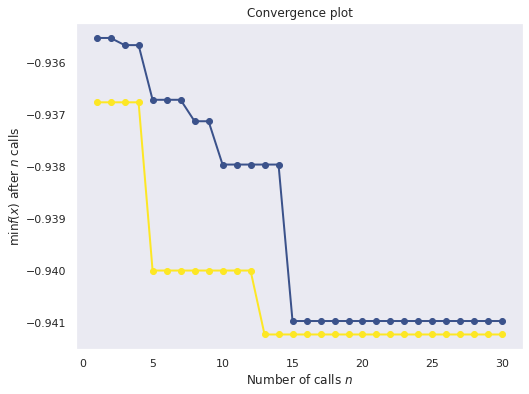

In [405]:
plot_convergence(resultado_rs_trg, resultado_gp_trg);

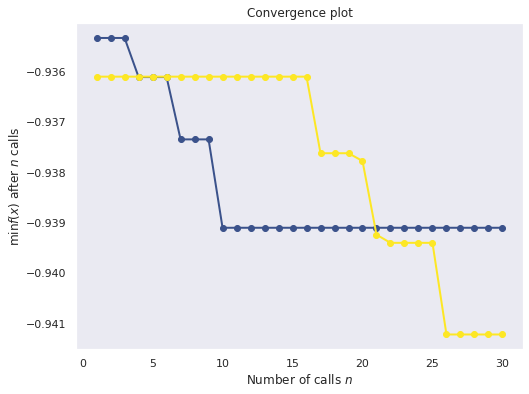

In [406]:
plot_convergence(resultado_rs_ohe, resultado_gp_ohe);


### Comparando os resultados do nosso modelo preliminar com os modelos tunados (*Busca Aleatória e Otimização Bayesiana*)

In [407]:
# Modelo preliminar
df_metrics_default.sort_values(['AUC','Accuracy'],ascending=False).head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Encoder
0,Random Forest Classifier,0.933126,0.934108,0.961905,0.956439,0.959164,TargetEncoder
0,Random Forest Classifier,0.925350,0.932865,0.960000,0.949153,0.954545,OneHotEncoder


In [408]:
# Código para agregar os dataframes Random Search e Bayesian Optimization
df_tunning = pd.concat([df_metrics_rs, df_metrics_bo], axis=0)
df_tunning.sort_values(['AUC','n_estimators'],ascending=False).head()

,FeatureSelector,AUC,n_estimators,max_depth,min_samples_leaf,min_samples_split,bootstrap,max_features,encoder
0,Bayesian Optimization,0.9412,139,90,1,3,False,auto,TargetEncoder
0,Bayesian Optimization,0.9412,72,198,1,9,False,sqrt,OneHotEncoder
0,Random Search,0.9410,130,178,4,6,False,sqrt,TargetEncoder
0,Random Search,0.9391,150,122,1,4,True,auto,OneHotEncoder


 Melhor resultado do Tunning foi:

* Feature Selector = **Bayesian Optimization**
 * AUC = *0.9412*
 * n_estimators = *139*
 * max_depth = *90*
 * min_samples_leaf = *1*	
 * min_samples_split =	*3*
 * bootstrap = *False*
 * max_features = *auto*
 * encoder = *TargetEncoder*


### Selecionado as melhores features para o modelo

Vamos selecionar as melhores features utilizando esses dois métodos:

* SelectFromModel
* SelectKBest

A seleção de features é o processo de redução do número de variáveis ​​de entrada ao desenvolver um modelo preditivo. 

É desejável reduzir o número de variáveis ​​de entrada para reduzir o custo computacional da modelagem e, em alguns casos, melhorar o desempenho do modelo. 

Os métodos de seleção de recurso baseados em estatística envolvem a avaliação do relacionamento entre cada variável de entrada e a variável de destino usando estatísticas e a seleção das variáveis ​​de entrada que têm o relacionamento mais forte com a variável de destino. Esses métodos podem ser rápidos e eficazes, embora a escolha de medidas estatísticas dependa do tipo de dados das variáveis ​​de entrada e saída.

Referência para a biblioteca Feature Selection: https://scikit-learn.org/stable/modules/feature_selection.html

Referência para a biblioteca Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [409]:
# Importando pacotes necessários
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression

#### Conjunto de dados transformado com o **TargetEncoder**

* Feature Selector = **Bayesian Optimization**
 * AUC = *0.9412*
 * n_estimators = *139*
 * max_depth = *90*
 * min_samples_leaf = *1*	
 * min_samples_split =	*3*
 * bootstrap = *False*
 * max_features = *auto*
 * encoder = *TargetEncoder*

##### SelectFromModel

Meta-transformador para selecionar features com base na importância dos pesos.

Referência: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [410]:
# Esse código faz a seleção das melhores features usando uma RandomForestClassifier, e usando o RandomForestClassifier para predição 
k_vs_acc = []
k_vs_auc = []
k_vs_recall = []
k_vs_precision = []
k_vs_f1 = []
features_list = []
k_numbers = []
encoder = []
seletor = []

for k in range(2, X_train_trg.shape[1], 2):
  selector_model = RandomForestClassifier(random_state=123, n_jobs=-1) 
  selector = SelectFromModel(selector_model, max_features=k, threshold=-np.inf)

  selector.fit(X_train_trg, y_train_trg)

  X_train2 = selector.transform(X_train_trg)
  X_test2 = selector.transform(X_test_trg)

  #print(X_train_ohe.shape, X_train2.shape)

  mdl = RandomForestClassifier(n_estimators=139, max_depth=90, min_samples_leaf=1, min_samples_split=3, bootstrap=False, max_features = 'auto', random_state=1234, n_jobs=-1)
  mdl.fit(X_train2, y_train_trg)

  p = mdl.predict(X_test2)
  y_proba = mdl.predict_proba(X_test2)[:, 1]
 
  acc = accuracy_score(y_test_trg, p)
  auc = roc_auc_score(y_test_trg, y_proba)
  recall = recall_score(y_test_trg, p)
  precision = precision_score(y_test_trg, p)
  f1 = f1_score(y_test_trg, p)

  print("k = {} - AUC = {}".format(k, auc))

  mask = selector.get_support()
  features = list(X_train_trg.columns[mask])
  #print(features)

  k_vs_acc.append(acc)
  k_vs_auc.append(auc)
  k_vs_recall.append(recall)
  k_vs_precision.append(precision)
  k_vs_f1.append(f1)
  features_list.append(features)
  k_numbers.append(X_train2.shape[1])
  encoder.append('TargetEncoder')
  seletor.append('RandomForestClassifier')

k = 2 - AUC = 0.7518563357546408
k = 4 - AUC = 0.7414043583535108
k = 6 - AUC = 0.874729620661824
k = 8 - AUC = 0.874043583535109
k = 10 - AUC = 0.8764003228410008
k = 12 - AUC = 0.897861178369653
k = 14 - AUC = 0.9090234059725585
k = 16 - AUC = 0.9231880548829702
k = 18 - AUC = 0.9289023405972558
k = 20 - AUC = 0.930589184826473
k = 22 - AUC = 0.9383373688458434
k = 24 - AUC = 0.9354156577885392


In [411]:
# Cria um novo dataframe com o resultado do processo
df1 = pd.DataFrame(list(zip(k_vs_acc, k_vs_auc, k_vs_recall, k_vs_precision, k_vs_f1, features_list,  k_numbers,  encoder, seletor)), columns = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-Score', 'Features', 'FeatureNumber', 'Encoder', 'Selector'])
df1.head()

,Accuracy,AUC,Recall,Precision,F1-Score,Features,FeatureNumber,Encoder,Selector
0,0.841369,0.751856,0.923810,0.886654,0.904851,"[VAL_A_PAGAR, FAIXA_DE_DIVIDA]",2,TargetEncoder,RandomForestClassifier
1,0.860031,0.741404,0.933333,0.899083,0.915888,"[VAL_A_PAGAR, FAIXA_DE_DIVIDA, ADIMP_N_REN, QT...",4,TargetEncoder,RandomForestClassifier
2,0.917574,0.874730,0.965714,0.935424,0.950328,"[NOM_SITUACAO_ALUNO, VAL_A_PAGAR, FAIXA_DE_DIV...",6,TargetEncoder,RandomForestClassifier
3,0.914463,0.874044,0.958095,0.938433,0.948162,"[NOM_SITUACAO_ALUNO, VAL_A_PAGAR, VAL_DIVIDA_M...",8,TargetEncoder,RandomForestClassifier
4,0.922240,0.876400,0.965714,0.940631,0.953008,"[NOM_SITUACAO_ALUNO, VAL_A_PAGAR, VAL_DIVIDA_M...",10,TargetEncoder,RandomForestClassifier


In [412]:
# Esse código faz a seleção das melhores features usando uma LogisticRegression, e usando uma RandomForestClassifier para predição 
k_vs_acc = []
k_vs_auc = []
k_vs_recall = []
k_vs_precision = []
k_vs_f1 = []
features_list = []
k_numbers = []
encoder = []
seletor = []

for k in range(2, X_train_trg.shape[1], 2):
  selector_model = LogisticRegression(random_state=123, n_jobs=-1)  
  selector = SelectFromModel(selector_model, max_features=k, threshold=-np.inf)

  selector.fit(X_train_trg, y_train_trg)

  X_train2 = selector.transform(X_train_trg)
  X_test2 = selector.transform(X_test_trg)

  mdl = RandomForestClassifier(n_estimators=139, max_depth=90, min_samples_leaf=1, min_samples_split=3, bootstrap=False, max_features = 'auto', random_state=1234, n_jobs=-1)
  mdl.fit(X_train2, y_train_trg)

  p = mdl.predict(X_test2)
  y_proba = mdl.predict_proba(X_test2)[:, 1]
 
  acc = accuracy_score(y_test_trg, p)
  auc = roc_auc_score(y_test_trg, y_proba)
  recall = recall_score(y_test_trg, p)
  precision = precision_score(y_test_trg, p)
  f1 = f1_score(y_test_trg, p)

  print("k = {} - AUC = {}".format(k, auc))

  mask = selector.get_support()
  features = list(X_train_trg.columns[mask])

  k_vs_acc.append(acc)
  k_vs_auc.append(auc)
  k_vs_recall.append(recall)
  k_vs_precision.append(precision)
  k_vs_f1.append(f1)
  features_list.append(features)
  k_numbers.append(X_train2.shape[1])
  encoder.append('TargetEncoder')
  seletor.append('LogisticRegression')

k = 2 - AUC = 0.6770540758676352
k = 4 - AUC = 0.7437046004842616
k = 6 - AUC = 0.6840112994350283
k = 8 - AUC = 0.7400242130750606
k = 10 - AUC = 0.8056820016142051
k = 12 - AUC = 0.8134786117836965
k = 14 - AUC = 0.8654075867635189
k = 16 - AUC = 0.896957223567393
k = 18 - AUC = 0.9137853107344631
k = 20 - AUC = 0.920363196125908
k = 22 - AUC = 0.9380387409200969
k = 24 - AUC = 0.9386279257465698


In [413]:
# Cria um novo dataframe com o resultado do processo
df2 = pd.DataFrame(list(zip(k_vs_acc, k_vs_auc, k_vs_recall, k_vs_precision, k_vs_f1, features_list,  k_numbers,  encoder, seletor)), columns = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-Score', 'Features', 'FeatureNumber', 'Encoder', 'Selector'])
df2.head()

,Accuracy,AUC,Recall,Precision,F1-Score,Features,FeatureNumber,Encoder,Selector
0,0.853810,0.677054,0.956190,0.876091,0.914390,"[ADIMP_N_REN, IND_INDICIO_EVASAO]",2,TargetEncoder,LogisticRegression
1,0.875583,0.743705,0.954286,0.899461,0.926063,"[ADIMP_N_REN, IND_INDICIO_EVASAO, ACEITE_CONTR...",4,TargetEncoder,LogisticRegression
2,0.790047,0.684011,0.874286,0.869318,0.871795,"[ADIMP_N_REN, CR_PER_ANT, IND_INDICIO_EVASAO, ...",6,TargetEncoder,LogisticRegression
3,0.818040,0.740024,0.895238,0.883459,0.889309,"[RISCO_INADIMPLENCIA, LATE_COMER, ADIMP_N_REN,...",8,TargetEncoder,LogisticRegression
4,0.856921,0.805682,0.910476,0.913958,0.912214,"[RISCO_INADIMPLENCIA, NOVO_FIES, LATE_COMER, N...",10,TargetEncoder,LogisticRegression


##### SelectKBest

Seleciona as features de acordo com as k pontuações mais altas.

Referência: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Referência: https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

In [414]:
# Esse código faz a seleção das melhores features usando o SelectKBest, e usando o RandomForestClassifier para predição 
k_vs_acc = []
k_vs_auc = []
k_vs_recall = []
k_vs_precision = []
k_vs_f1 = []
features_list = []
k_numbers = []
encoder = []
seletor = []

for k in range(2,X_train_trg.shape[1],2):
  selector = SelectKBest(score_func= f_classif, k=k)

  X_train2 = selector.fit_transform(X_train_trg, y_train_trg)
  X_test2 = selector.transform(X_test_trg)

  mdl = RandomForestClassifier(n_estimators=139, max_depth=90, min_samples_leaf=1, min_samples_split=3, bootstrap=False, max_features = 'auto', random_state=1234, n_jobs=-1)
  mdl.fit(X_train2, y_train_trg)

  p = mdl.predict(X_test2)
  y_proba = mdl.predict_proba(X_test2)[:, 1]
 
  acc = accuracy_score(y_test_trg, p)
  auc = roc_auc_score(y_test_trg, y_proba)
  recall = recall_score(y_test_trg, p)
  precision = precision_score(y_test_trg, p)
  f1 = f1_score(y_test_trg, p)

  print("k = {} - AUC = {}".format(k, auc))

  mask = selector.get_support()
  features = list(X_train_trg.columns[mask])

  k_vs_acc.append(acc)
  k_vs_auc.append(auc)
  k_vs_recall.append(recall)
  k_vs_precision.append(precision)
  k_vs_f1.append(f1)
  features_list.append(features)
  k_numbers.append(X_train2.shape[1])
  encoder.append('TargetEncoder')
  seletor.append('SelectKBest')

k = 2 - AUC = 0.6928894269572237
k = 4 - AUC = 0.6980952380952381
k = 6 - AUC = 0.7570944309927361
k = 8 - AUC = 0.8593785310734464
k = 10 - AUC = 0.8642130750605327
k = 12 - AUC = 0.8955609362389021
k = 14 - AUC = 0.9113317191283293
k = 16 - AUC = 0.9101452784503632
k = 18 - AUC = 0.9145278450363197
k = 20 - AUC = 0.9293785310734463
k = 22 - AUC = 0.9296610169491526
k = 24 - AUC = 0.9336481033091202


In [415]:
# Cria um novo dataframe com o resultado do processo
df3 = pd.DataFrame(list(zip(k_vs_acc, k_vs_auc, k_vs_recall, k_vs_precision, k_vs_f1, features_list,  k_numbers,  encoder, seletor)), columns = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-Score', 'Features', 'FeatureNumber', 'Encoder', 'Selector'])
df3.head()

,Accuracy,AUC,Recall,Precision,F1-Score,Features,FeatureNumber,Encoder,Selector
0,0.875583,0.692889,0.990476,0.873950,0.928571,"[TIPO_INADIMPLENCIA, FAIXA_DE_DIVIDA]",2,TargetEncoder,SelectKBest
1,0.858476,0.698095,0.960000,0.878049,0.917197,"[TIPO_INADIMPLENCIA, VAL_DIVIDA_TOTAL, FAIXA_D...",4,TargetEncoder,SelectKBest
2,0.872473,0.757094,0.954286,0.896243,0.924354,"[TIPO_INADIMPLENCIA, VAL_DIVIDA_TOTAL, FAIXA_D...",6,TargetEncoder,SelectKBest
3,0.889580,0.859379,0.925714,0.938224,0.931927,"[TIPO_INADIMPLENCIA, NOM_SITUACAO_ALUNO, VAL_D...",8,TargetEncoder,SelectKBest
4,0.897356,0.864213,0.937143,0.937143,0.937143,"[TIPO_INADIMPLENCIA, NOM_SITUACAO_ALUNO, VAL_A...",10,TargetEncoder,SelectKBest


### Juntando todos os DataFrames

Esse DataFrame que criaremos servirá como uma consulta/análise com todos os resultados (métricas) dos dados do testes do modelo, e também os método que utilizamos para isso.

Colunas criadas:

* **Accuracy** - Métrica Acurácia
* **AUC** - Métrica AUC
* **Recall** - Métrica Recall
* **Precision** - Métrica Precisão
* **F1-Score** - Métrica F1-Score
* **Features** - Features mais importantes
* **FeatureNumber** - Número de features usadas
* **Encoder** - Encoder usado para treinamento/teste do modelo (OneHotEncoder e TargetEncoder)
* **Selector** - Seletor de features usado para treinamento/teste do modelo (SelectFromModel e SelectKBest)

Fizemos uma explicação de cada métrica no notebook anterior com o [PyCaret](https://github.com/rmendesl/TCC/blob/master/03_CreateModelPyCaret.ipynb) no tópico **Entendendo as métricas**

Link: https://github.com/rmendesl/TCC/blob/master/03_CreateModelPyCaret.ipynb

In [416]:
# Código para agregar os dataframes dos processos anteriores
df_prediticion = pd.concat([df1,df2,df3], axis=0)
df_prediticion.head()

,Accuracy,AUC,Recall,Precision,F1-Score,Features,FeatureNumber,Encoder,Selector
0,0.841369,0.751856,0.923810,0.886654,0.904851,"[VAL_A_PAGAR, FAIXA_DE_DIVIDA]",2,TargetEncoder,RandomForestClassifier
1,0.860031,0.741404,0.933333,0.899083,0.915888,"[VAL_A_PAGAR, FAIXA_DE_DIVIDA, ADIMP_N_REN, QT...",4,TargetEncoder,RandomForestClassifier
2,0.917574,0.874730,0.965714,0.935424,0.950328,"[NOM_SITUACAO_ALUNO, VAL_A_PAGAR, FAIXA_DE_DIV...",6,TargetEncoder,RandomForestClassifier
3,0.914463,0.874044,0.958095,0.938433,0.948162,"[NOM_SITUACAO_ALUNO, VAL_A_PAGAR, VAL_DIVIDA_M...",8,TargetEncoder,RandomForestClassifier
4,0.922240,0.876400,0.965714,0.940631,0.953008,"[NOM_SITUACAO_ALUNO, VAL_A_PAGAR, VAL_DIVIDA_M...",10,TargetEncoder,RandomForestClassifier


In [422]:
# Filtrando somente as 10 maiores métricas para análise
df_filter = df_prediticion[(df_prediticion['AUC'] >= 0.93)]
df_filter.sort_values('AUC',ascending=False).head(10)

,Accuracy,AUC,Recall,Precision,F1-Score,Features,FeatureNumber,Encoder,Selector
11,0.923795,0.938628,0.958095,0.949057,0.953555,"[TIPO_INADIMPLENCIA, RISCO_INADIMPLENCIA, CLAS...",24,TargetEncoder,LogisticRegression
10,0.923795,0.938337,0.956190,0.950758,0.953466,"[TIPO_INADIMPLENCIA, RISCO_INADIMPLENCIA, CLAS...",22,TargetEncoder,RandomForestClassifier
10,0.922240,0.938039,0.956190,0.948960,0.952562,"[TIPO_INADIMPLENCIA, RISCO_INADIMPLENCIA, CLAS...",22,TargetEncoder,LogisticRegression
11,0.925350,0.935416,0.956190,0.952562,0.954373,"[TIPO_INADIMPLENCIA, RISCO_INADIMPLENCIA, CLAS...",24,TargetEncoder,RandomForestClassifier
11,0.925350,0.933648,0.956190,0.952562,0.954373,"[TIPO_INADIMPLENCIA, RISCO_INADIMPLENCIA, CLAS...",24,TargetEncoder,SelectKBest
9,0.920684,0.930589,0.954286,0.948864,0.951567,"[TIPO_INADIMPLENCIA, RISCO_INADIMPLENCIA, CLAS...",20,TargetEncoder,RandomForestClassifier


In [423]:
# Salvando o DataFrame das métrica para análise (opcional). Descomente a linha abaixo.
#df_prediticion.to_excel(root_path + 'metricas_sklearn.xlsx', sheet_name='Metricas', index=False)

In [428]:
# Modelo Preliminar
df_metrics_default

,Model,Accuracy,AUC,Recall,Prec.,F1,Encoder
0,Random Forest Classifier,0.925350,0.932865,0.960000,0.949153,0.954545,OneHotEncoder
0,Random Forest Classifier,0.933126,0.934108,0.961905,0.956439,0.959164,TargetEncoder


In [430]:
# Features = 24
df_filter2 = df_prediticion[(df_prediticion['AUC'] >= 0.93862) & (df_prediticion['FeatureNumber'] == 24)]
list(df_filter2['Features'])

[['TIPO_INADIMPLENCIA',
  'RISCO_INADIMPLENCIA',
  'CLASSE_PAGANTE_ANT',
  'CLASSE_PAGANTE_ATU',
  'NOVO_FIES',
  'PRV_ANT',
  'PRV_ATU',
  'LATE_COMER',
  'NOM_SITUACAO_ALUNO',
  'VAL_A_PAGAR',
  'VAL_A_PAGAR_PAR',
  'VAL_DIVIDA_TOTAL',
  'FAIXA_DE_DIVIDA',
  'ADIMP_N_REN',
  'CR_PER_ANT',
  'FAIXA_APROVACAO',
  'QTD_ACESSOS_19_2',
  'QTD_ACESSOS_20_1',
  'IND_INDICIO_EVASAO',
  'CLASSIFICACAO_PROP_EVASAO',
  'CLASSIFICACAO_PROP_RENOVACAO',
  'ACEITE_CONTRATO',
  'REQ_AGEND_TRANC',
  'SAFRA']]

### Métricas do modelo tunado

In [431]:
# Métricas do modelo tunado

k=24
selector_model = LogisticRegression(random_state=123, n_jobs=-1)  
selector = SelectFromModel(selector_model, max_features=k, threshold=-np.inf)

selector.fit(X_train_trg, y_train_trg)

X_train2 = selector.transform(X_train_trg)
X_test2 = selector.transform(X_test_trg)

mdl = RandomForestClassifier(n_estimators=139, max_depth=90, min_samples_leaf=1, min_samples_split=3, bootstrap=False, max_features = 'auto', random_state=1234, n_jobs=-1)
mdl.fit(X_train2, y_train_trg)

p = mdl.predict(X_test2)
y_proba = mdl.predict_proba(X_test2)[:, 1]
 
acc = accuracy_score(y_test_trg, p)
auc = roc_auc_score(y_test_trg, y_proba)
recall = recall_score(y_test_trg, p)
precision = precision_score(y_test_trg, p)
f1 = f1_score(y_test_trg, p)

mask = selector.get_support()
features = list(X_train_trg.columns[mask])

mdl

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=139,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [432]:
# Resultado final do modelo
cols   = ['Model', 'Accuracy', 'AUC', 'Recall', 'Prec.', 'F1']
values = ['Random Forest Classifier', acc, auc, recall, precision, f1]
metrics_tunning = pd.DataFrame({tup[0]: [tup[1]] for tup in zip(cols, values)})
metrics_tunning

,Model,Accuracy,AUC,Recall,Prec.,F1
0,Random Forest Classifier,0.923795,0.938628,0.958095,0.949057,0.953555


In [433]:
# Média de importância de cada Feature no modelo
df_feature_importance = pd.DataFrame(mdl.feature_importances_,  index=features, columns=['Feature importance']).sort_values('Feature importance', ascending=False)
df_feature_importance

,Feature importance
FAIXA_DE_DIVIDA,0.131409
VAL_A_PAGAR,0.101880
VAL_DIVIDA_TOTAL,0.083510
NOM_SITUACAO_ALUNO,0.079328
QTD_ACESSOS_20_1,0.078563
CR_PER_ANT,0.077287
ADIMP_N_REN,0.076998
ACEITE_CONTRATO,0.055648
QTD_ACESSOS_19_2,0.054100
TIPO_INADIMPLENCIA,0.050662


In [434]:
# Todas as features mais importantes para cada árvore
df_feature_all = pd.DataFrame([mdl.feature_importances_ for tree in mdl.estimators_], columns=features)
df_feature_all.head()

,TIPO_INADIMPLENCIA,RISCO_INADIMPLENCIA,CLASSE_PAGANTE_ANT,CLASSE_PAGANTE_ATU,NOVO_FIES,PRV_ANT,PRV_ATU,LATE_COMER,NOM_SITUACAO_ALUNO,VAL_A_PAGAR,VAL_A_PAGAR_PAR,VAL_DIVIDA_TOTAL,FAIXA_DE_DIVIDA,ADIMP_N_REN,CR_PER_ANT,FAIXA_APROVACAO,QTD_ACESSOS_19_2,QTD_ACESSOS_20_1,IND_INDICIO_EVASAO,CLASSIFICACAO_PROP_EVASAO,CLASSIFICACAO_PROP_RENOVACAO,ACEITE_CONTRATO,REQ_AGEND_TRANC,SAFRA
0,0.050662,0.018085,0.018752,0.018455,0.002539,0.004786,0.00166,0.002946,0.079328,0.10188,0.007477,0.08351,0.131409,0.076998,0.077287,0.015654,0.0541,0.078563,0.043791,0.015212,0.029553,0.055648,0.023075,0.008631
1,0.050662,0.018085,0.018752,0.018455,0.002539,0.004786,0.00166,0.002946,0.079328,0.10188,0.007477,0.08351,0.131409,0.076998,0.077287,0.015654,0.0541,0.078563,0.043791,0.015212,0.029553,0.055648,0.023075,0.008631
2,0.050662,0.018085,0.018752,0.018455,0.002539,0.004786,0.00166,0.002946,0.079328,0.10188,0.007477,0.08351,0.131409,0.076998,0.077287,0.015654,0.0541,0.078563,0.043791,0.015212,0.029553,0.055648,0.023075,0.008631
3,0.050662,0.018085,0.018752,0.018455,0.002539,0.004786,0.00166,0.002946,0.079328,0.10188,0.007477,0.08351,0.131409,0.076998,0.077287,0.015654,0.0541,0.078563,0.043791,0.015212,0.029553,0.055648,0.023075,0.008631
4,0.050662,0.018085,0.018752,0.018455,0.002539,0.004786,0.00166,0.002946,0.079328,0.10188,0.007477,0.08351,0.131409,0.076998,0.077287,0.015654,0.0541,0.078563,0.043791,0.015212,0.029553,0.055648,0.023075,0.008631


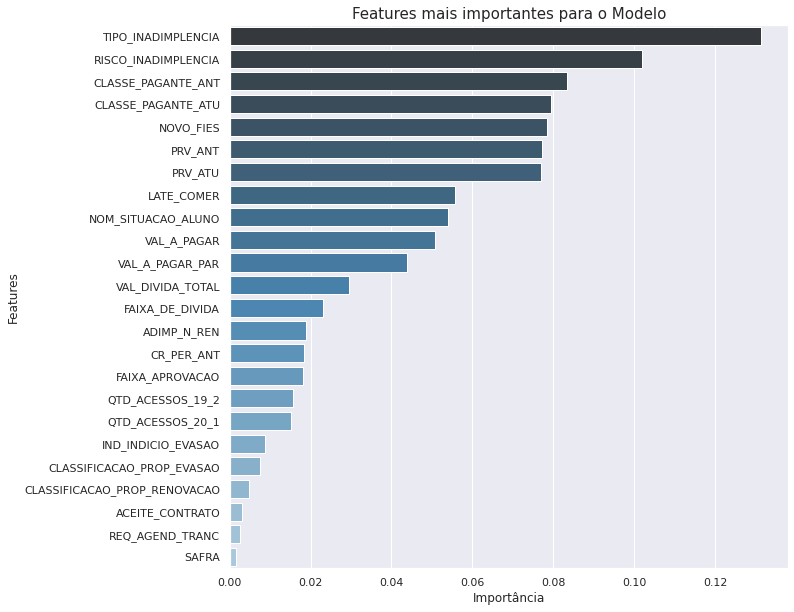

In [441]:
fig, axs = plt.subplots(figsize=(10, 10), ncols=1)
plot = sns.barplot(x=df_feature_importance['Feature importance'], y=features, ax=axs, palette="Blues_d")

plot.set_title('Features mais importantes para o Modelo', size=15)
plot.set_xlabel('Importância')
plot.set_ylabel('Features')

# Exportar o gráfico, substitua o caminho pelo seu caminho de preferência
#fig.savefig('/content/drive/My Drive/TCC/Graficos/FeatureImportance.png')

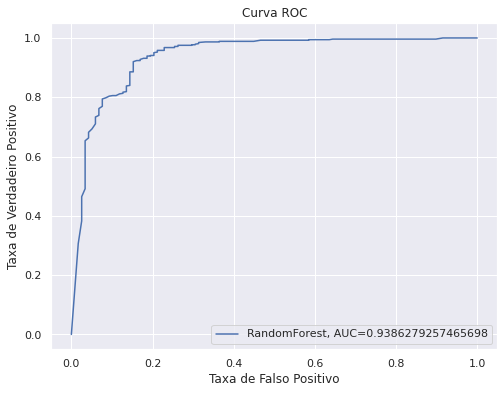

<Figure size 576x432 with 0 Axes>

In [440]:
fpr, tpr, _ = roc_curve(y_test_trg, y_proba)
auc = roc_auc_score(y_test_trg, y_proba)

plt.plot(fpr, tpr,  label="RandomForest, AUC="+str(auc))
plt.title('Curva ROC')
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.legend()
plt.show()

# Exportar o gráfico, substitua o caminho pelo seu caminho de preferência
#plt.savefig('/content/drive/My Drive/TCC/Graficos/ROCCurve.png')

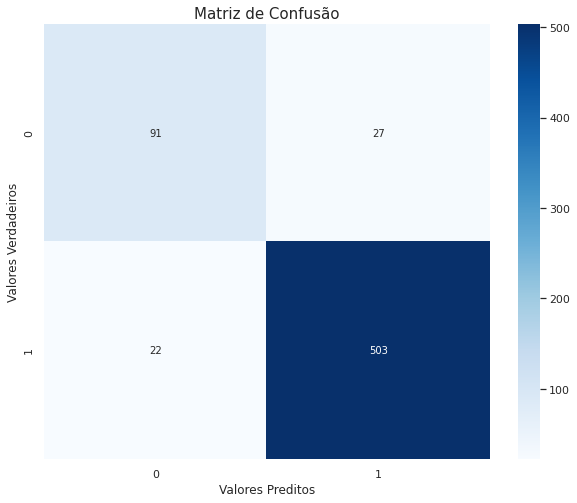

In [439]:
fig, axs = plt.subplots(figsize=(10, 8), ncols=1)
cm = confusion_matrix(y_test_trg, p)
plot = sns.heatmap(cm, annot = True, ax = axs, fmt='g', cmap='Blues');

plot.set_xlabel('Valores Preditos');
plot.set_ylabel('Valores Verdadeiros'); 
plot.set_title('Matriz de Confusão', size=15); 
plot.xaxis.set_ticklabels(['0', '1']); 
plot.yaxis.set_ticklabels(['0', '1']);

# Exportar o gráfico, substitua o caminho pelo seu caminho de preferência
#fig.savefig('/content/drive/My Drive/TCC/Graficos/ConfusionMatrix.png')

In [438]:
# Imprimindo a Matriz de Confusão
print(confusion_matrix(y_test_trg, p))

# Imprimindo a Precision e Recall
print(classification_report(y_test_trg, p, digits=6))

[[ 91  27]
 [ 22 503]]
              precision    recall  f1-score   support

           0   0.805310  0.771186  0.787879       118
           1   0.949057  0.958095  0.953555       525

    accuracy                       0.923795       643
   macro avg   0.877183  0.864641  0.870717       643
weighted avg   0.922677  0.923795  0.923151       643



### Criando o nosso modelo

Usaremos o modelo [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) para a criação do nosso modelo de machine learning, como já mencionado.

Analisando o resultado das métricas em nosso DataFrame, escolhi as seguintes:

* Método de Seleção de Feature = **LogisticRegression**
* Método de Encoder para as variáveis categórica = **TargetEncoder**
* Número de Features = **24**

In [442]:
# Código para a criação do modelo padrão
k = 24
selector_model = LogisticRegression(random_state=123, n_jobs=-1)  
selector = SelectFromModel(selector_model, max_features=k, threshold=-np.inf)

selector.fit(X_train_trg, y_train_trg)

X_train2 = selector.transform(X_train_trg)
X_test2 = selector.transform(X_test_trg)

mdl = RandomForestClassifier(n_estimators=139, max_depth=90, min_samples_leaf=1, min_samples_split=3, bootstrap=False, max_features = 'auto', random_state=1234, n_jobs=-1)
mdl.fit(X_train2, y_train_trg)

p = mdl.predict(X_test2)
y_proba = mdl.predict_proba(X_test2)[:, 1]
 
acc = accuracy_score(y_test_trg, p)
auc = roc_auc_score(y_test_trg, y_proba)
recall = recall_score(y_test_trg, p)
precision = precision_score(y_test_trg, p)
f1 = f1_score(y_test_trg, p)

mask = selector.get_support()
features = X_train_trg.columns[mask]

mdl

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=139,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [443]:
# Resultado final do modelo padrão
cols   = ['Model', 'Accuracy', 'AUC', 'Recall', 'Prec.', 'F1']
values = ['Random Forest Classifier', acc, auc, recall, precision, f1]
metrics_default = pd.DataFrame({tup[0]: [tup[1]] for tup in zip(cols, values)})
metrics_default

,Model,Accuracy,AUC,Recall,Prec.,F1
0,Random Forest Classifier,0.923795,0.938628,0.958095,0.949057,0.953555
